# **Muhamad Gatot Supiadin**
## M183X0343 | M01 - Pengembangan Machine Learning dan Front End Web
## Universitas Amikom Yogyakarta , Sleman Yogyakarta

**Import Library**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile, os
import shutil
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadgatot","key":"1fd992169d598ee1ffc8635e9a98b5b0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d jehanbhathena/weather-dataset

 99% 579M/587M [00:10<00:00, 29.6MB/s]
100% 587M/587M [00:10<00:00, 58.9MB/s]


In [5]:
!unzip '/content/weather-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/frost/3913.jpg  
  inflating: dataset/frost/3914.jpg  
  inflating: dataset/frost/3915.jpg  
  inflating: dataset/frost/3916.jpg  
  inflating: dataset/frost/3917.jpg  
  inflating: dataset/frost/3918.jpg  
  inflating: dataset/frost/3919.jpg  
  inflating: dataset/frost/3920.jpg  
  inflating: dataset/frost/3921.jpg  
  inflating: dataset/frost/3922.jpg  
  inflating: dataset/frost/3923.jpg  
  inflating: dataset/frost/3924.jpg  
  inflating: dataset/frost/3925.jpg  
  inflating: dataset/frost/3926.jpg  
  inflating: dataset/frost/3927.jpg  
  inflating: dataset/frost/3928.jpg  
  inflating: dataset/frost/3929.jpg  
  inflating: dataset/frost/3930.jpg  
  inflating: dataset/frost/3931.jpg  
  inflating: dataset/frost/3932.jpg  
  inflating: dataset/frost/3933.jpg  
  inflating: dataset/frost/3934.jpg  
  inflating: dataset/frost/3935.jpg  
  inflating: dataset/frost/3936.jpg  
  inflating: dataset/frost/3937.jpg  

In [6]:
def list_files(path):
  files_num = 0
  for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * (level)
    files_num += len(files)
    print('{}{}/ {}'.format(indent, os.path.basename(root), (str(len(files)) + ' images' if len(files) > 0 else '')))
  
  return files_num

In [7]:
base_dir = '/content/dataset'
list_files(base_dir)

dataset/ 
  lightning/ 377 images
  hail/ 591 images
  snow/ 621 images
  rime/ 1160 images
  sandstorm/ 692 images
  rainbow/ 232 images
  glaze/ 639 images
  dew/ 698 images
  frost/ 475 images
  fogsmog/ 851 images
  rain/ 526 images


6862

In [8]:
!rm -rf '/content/dataset/lightning'
!rm -rf '/content/dataset/hail'
!rm -rf '/content/dataset/sandstorm'
!rm -rf '/content/dataset/rainbow'
!rm -rf '/content/dataset/glaze'
!rm -rf '/content/dataset/frost'
!rm -rf '/content/dataset/rain'

In [9]:
def read_files(path):
  image_files = []
  for dirname, dirnames, filenames in os.walk(path):
    for filename in filenames:
      image_files.append(os.path.join(dirname, filename))
  
  return image_files

In [10]:
full_directory = read_files(base_dir)
image_sizes = []
for file in full_directory:
  image = PIL.Image.open(file)
  width, height = image.size
  image_sizes.append(f'{width}x{height}')

unique_sizes = set(image_sizes)

print(f'Image size list (first 15 unique size): \n{list(unique_sizes)[:15]}')

Image size list (first 15 unique size): 
['860x573', '386x240', '600x420', '400x283', '331x383', '600x600', '1143x699', '857x1280', '323x202', '900x563', '289x175', '400x251', '400x275', '900x599', '274x190']


In [11]:
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')

In [12]:
fogsmog_dir = os.path.join(base_dir, 'fogsmog')
dew_dir = os.path.join(base_dir, 'dew')
rime_dir = os.path.join(base_dir, 'rime')
snow_dir = os.path.join(base_dir, 'snow')

In [13]:
os.mkdir(train_dir)
os.mkdir(valid_dir)

In [14]:
fogsmog_train = os.path.join(train_dir, 'fogsmog')
dew_train = os.path.join(train_dir, 'dew')
rime_train = os.path.join(train_dir, 'rime')
snow_train = os.path.join(train_dir, 'snow')

In [15]:
fogsmog_val = os.path.join(valid_dir, 'fogsmog')
dew_val = os.path.join(valid_dir, 'dew')
rime_val = os.path.join(valid_dir, 'rime')
snow_val = os.path.join(valid_dir, 'snow')

In [16]:
os.mkdir(fogsmog_train)
os.mkdir(dew_train)
os.mkdir(rime_train)
os.mkdir(snow_train)

os.mkdir(fogsmog_val)
os.mkdir(dew_val)
os.mkdir(rime_val)
os.mkdir(snow_val)

In [17]:
from sklearn.model_selection import train_test_split

fogsmog_train_dir, fogsmog_val_dir = train_test_split(os.listdir(fogsmog_dir), test_size=0.20)
dew_train_dir, dew_val_dir = train_test_split(os.listdir(dew_dir), test_size=0.20)
rime_train_dir, rime_val_dir = train_test_split(os.listdir(rime_dir), test_size=0.20)
snow_train_dir, snow_val_dir = train_test_split(os.listdir(snow_dir), test_size=0.20)

In [18]:
for file in fogsmog_train_dir:
  shutil.copy(os.path.join(fogsmog_dir, file), os.path.join(fogsmog_train, file))
for file in dew_train_dir:
  shutil.copy(os.path.join(dew_dir, file), os.path.join(dew_train, file))
for file in rime_train_dir:
  shutil.copy(os.path.join(rime_dir, file), os.path.join(rime_train, file))
for file in snow_train_dir:
  shutil.copy(os.path.join(snow_dir, file), os.path.join(snow_train, file))
for file in fogsmog_val_dir:
  shutil.copy(os.path.join(fogsmog_dir, file), os.path.join(fogsmog_val, file))
for file in dew_val_dir:
  shutil.copy(os.path.join(dew_dir, file), os.path.join(dew_val, file))
for file in rime_val_dir:
  shutil.copy(os.path.join(rime_dir, file), os.path.join(rime_val, file))
for file in snow_val_dir:
  shutil.copy(os.path.join(snow_dir, file), os.path.join(snow_val, file))

In [20]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [85]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (100,100),
    batch_size = 4,
    class_mode = 'categorical' 
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (100,100),
    batch_size = 4,
    class_mode = 'categorical'
)

Found 2662 images belonging to 4 classes.
Found 668 images belonging to 4 classes.


In [95]:
class WetCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.90) and (logs.get('val_accuracy')>=0.90):
      print('\nAkurasi train dan test telah mencapai 90% !')
      self.model.stop_training = True
callbacks = WetCallbacks()

In [104]:
IMG_SHAPE = (100,100, 3)

In [103]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(5, (3, 3), activation='relu', input_shape=(IMG_SHAPE)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SHAPE)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(IMG_SHAPE)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', input_shape=(IMG_SHAPE)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(83, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 126, 126, 5)       140       
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 63, 63, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 61, 61, 16)        736       
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_104 (Conv2D)         (None, 28, 28, 128)       18560     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 14, 14, 128)    

In [94]:
epoch = 150
history = model.fit(
    train_generator,
    steps_per_epoch = 30,
    epochs = epoch,
    validation_data = valid_generator,
    validation_steps = 20,
    batch_size = 128,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/150
30/30 - 3s - loss: 0.4787 - accuracy: 0.7750 - val_loss: 0.4340 - val_accuracy: 0.8500 - 3s/epoch - 111ms/step
Epoch 2/150
30/30 - 3s - loss: 0.4669 - accuracy: 0.8333 - val_loss: 0.6450 - val_accuracy: 0.8125 - 3s/epoch - 102ms/step
Epoch 3/150
30/30 - 3s - loss: 0.5276 - accuracy: 0.8167 - val_loss: 0.6006 - val_accuracy: 0.7750 - 3s/epoch - 108ms/step
Epoch 4/150
30/30 - 3s - loss: 0.4917 - accuracy: 0.8583 - val_loss: 0.4572 - val_accuracy: 0.8125 - 3s/epoch - 112ms/step
Epoch 5/150
30/30 - 3s - loss: 0.4762 - accuracy: 0.8167 - val_loss: 0.3956 - val_accuracy: 0.8500 - 3s/epoch - 110ms/step
Epoch 6/150
30/30 - 3s - loss: 0.3164 - accuracy: 0.8667 - val_loss: 0.5613 - val_accuracy: 0.8375 - 3s/epoch - 104ms/step
Epoch 7/150
30/30 - 3s - loss: 0.7475 - accuracy: 0.7083 - val_loss: 0.5681 - val_accuracy: 0.7750 - 3s/epoch - 109ms/step
Epoch 8/150
30/30 - 3s - loss: 0.4215 - accuracy: 0.7917 - val_loss: 0.5420 - val_accuracy: 0.8000 - 3s/epoch - 113ms/step
Epoch 9/150
30/3

**Plotting Model**

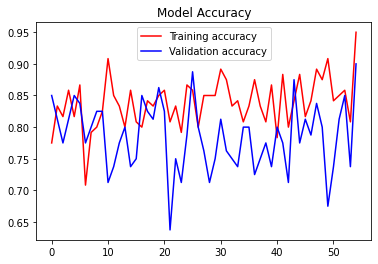

<Figure size 432x288 with 0 Axes>

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Model Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

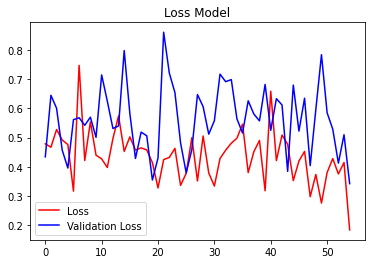

<Figure size 432x288 with 0 Axes>

In [99]:
plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss Model')
plt.legend(loc=0)
plt.figure()

plt.show()

**Convert Model To tflite**

In [100]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite = converter.convert()

In [102]:
with tf.io.gfile.GFile('weather_model.tflite', 'wb') as f:
  f.write(tflite)